# Handwritten Digit Recognition - Machine Learning

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import time

In [4]:
data=pd.read_csv("./images_chiffres_codees_niveau_de_gris.csv").values
clf=DecisionTreeClassifier()
print(data.shape)
n = len(data)
split = int(0.8 * n)

(2559, 785)


#### Training: 

In [5]:
x=data[:split,1:]
label=data[0:split,0]
clf.fit(x,label)

DecisionTreeClassifier()

#### Testing: 

In [6]:
xtest=data[split:,1:]
actual_label=data[split:,0]

Prediction: 

In [7]:
p=clf.predict(xtest)
print(p)

[4 5 6 1 7 1 2 7 2 0 0 8 1 7 1 0 4 8 8 8 7 5 8 8 6 5 1 5 8 6 3 6 1 7 0 1 5
 4 8 1 2 6 9 6 2 9 9 7 2 2 0 6 8 8 1 6 9 0 2 1 5 1 1 0 9 4 9 2 7 9 1 6 0 1
 2 4 5 4 7 1 5 9 8 7 0 9 3 3 9 4 7 7 8 0 4 7 0 6 0 8 2 2 4 8 3 5 2 2 0 5 6
 8 6 9 8 4 0 6 6 6 2 5 1 9 7 4 1 2 3 2 9 7 3 7 7 9 7 7 7 5 1 9 4 8 8 3 0 9
 4 2 6 6 8 9 5 4 4 1 6 1 3 3 1 7 2 6 7 5 1 4 0 0 4 9 4 1 4 6 3 2 5 2 0 1 1
 5 9 3 7 3 7 1 8 2 5 1 2 2 1 9 1 4 5 9 1 7 5 4 8 1 4 6 3 7 9 6 4 2 8 0 0 7
 6 8 3 3 0 5 7 3 4 7 9 1 7 6 1 6 1 3 6 2 0 3 5 1 7 6 4 9 3 4 6 5 1 5 5 3 7
 9 3 3 5 0 9 1 1 7 2 1 2 6 8 5 3 6 1 3 9 7 3 2 9 4 4 3 2 9 5 2 0 1 1 1 1 6
 9 0 7 9 9 6 8 5 7 6 7 9 6 1 9 9 3 3 0 1 1 5 3 0 1 2 0 6 1 4 1 8 9 7 8 9 4
 3 4 0 0 4 0 6 6 0 5 9 7 4 4 3 4 5 6 2 4 4 9 5 5 6 7 2 9 1 0 1 4 5 6 9 9 0
 9 9 9 6 2 4 5 7 7 2 5 2 1 6 3 6 7 9 7 7 7 6 3 5 7 9 0 0 8 7 3 6 3 5 5 4 6
 7 4 7 0 9 3 2 8 1 8 4 4 5 7 2 3 4 0 8 6 1 7 6 6 4 6 1 9 1 9 6 5 5 0 8 4 3
 1 0 8 0 2 3 6 3 5 1 7 0 5 9 2 2 3 7 5 7 4 6 9 4 2 4 1 9 0 9 2 1 7 6 3 7 2
 0 4 5 5 6 4 5 5 9 5 5 6 

Accuracy:

In [8]:
dt_accuracy = accuracy_score(actual_label, p) * 100
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}%")

Decision Tree Accuracy: 74.80%


## Decision Tree Limitations

While Decision Trees are interpretable and easy to understand, they have several limitations for image classification tasks:

### 1. **Overfitting**
- Decision Trees can create very deep trees that memorize training data
- High variance: small changes in data can lead to completely different trees
- Poor generalization to new, unseen data

### 2. **High Dimensionality Issues**
- With 784 features (pixels), Decision Trees struggle to find optimal splits
- Each split considers only one feature at a time, missing complex pixel relationships
- Not well-suited for spatial patterns in images

### 3. **Instability**
- Sensitive to noise in the data
- Small variations can cause significant changes in the tree structure
- As seen in the noise test, performance degrades with image degradation

### 4. **Limited Feature Interactions**
- Decision Trees make axis-aligned splits (only horizontal/vertical in feature space)
- Cannot capture complex non-linear relationships between pixels
- Misses spatial correlations that are important for image recognition

### 5. **Performance on Image Data**
- Current accuracy: ~73.6% : leaves significant room for improvement
- Image recognition typically requires models that understand spatial patterns
- Better suited for tabular data than pixel-based image classification

Let's explore alternative models that address these limitations!

## Model Comparison: Alternative Approaches

We'll compare the Decision Tree with three alternative models that are better suited for image classification:

1. **Random Forest**: Ensemble of Decision Trees - reduces overfitting
2. **Support Vector Machine (SVM)**: Captures complex non-linear patterns
3. **K-Nearest Neighbors (KNN)**: Instance-based learning, good for local patterns

### 1. Random Forest Classifier

**Advantages over Decision Tree:**
- Reduces overfitting by averaging multiple trees
- Handles high-dimensional data better
- More robust to noise
- Better generalization

In [9]:
# Random Forest Classifier
print("Training Random Forest...")
start_time = time.time()
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_clf.fit(x, label)
rf_train_time = time.time() - start_time

rf_predictions = rf_clf.predict(xtest)
rf_accuracy = accuracy_score(actual_label, rf_predictions) * 100

print(f"Random Forest Accuracy: {rf_accuracy:.2f}%")
print(f"Training Time: {rf_train_time:.2f} seconds")

Training Random Forest...
Random Forest Accuracy: 93.16%
Training Time: 0.24 seconds


### 2. Support Vector Machine (SVM)

**Advantages:**
- Effective in high-dimensional spaces (784 features)
- Uses kernel trick to capture non-linear relationships
- Good generalization with proper regularization
- Robust to overfitting

In [10]:
# Support Vector Machine (SVM)
# Using RBF kernel for non-linear classification
print("Training SVM (this may take a while)...")
start_time = time.time()
svm_clf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_clf.fit(x, label)
svm_train_time = time.time() - start_time

svm_predictions = svm_clf.predict(xtest)
svm_accuracy = accuracy_score(actual_label, svm_predictions) * 100

print(f"SVM Accuracy: {svm_accuracy:.2f}%")
print(f"Training Time: {svm_train_time:.2f} seconds")

Training SVM (this may take a while)...
SVM Accuracy: 94.14%
Training Time: 0.54 seconds


### 3. K-Nearest Neighbors (KNN)

**Advantages:**
- Simple and intuitive
- No training phase (lazy learning)
- Good for local patterns
- Can capture complex decision boundaries

In [11]:
# K-Nearest Neighbors
print("Training KNN...")
start_time = time.time()
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance', n_jobs=-1)
knn_clf.fit(x, label)
knn_train_time = time.time() - start_time

knn_predictions = knn_clf.predict(xtest)
knn_accuracy = accuracy_score(actual_label, knn_predictions) * 100

print(f"KNN Accuracy: {knn_accuracy:.2f}%")
print(f"Training Time: {knn_train_time:.2f} seconds")

Training KNN...
KNN Accuracy: 92.19%
Training Time: 0.01 seconds


## Model Comparison Results

In [12]:
# Create comparison dataframe
results = {
    'Model': ['Decision Tree', 'Random Forest', 'SVM', 'KNN'],
    'Accuracy (%)': [dt_accuracy, rf_accuracy, svm_accuracy, knn_accuracy],
    'Training Time (s)': [0, rf_train_time, svm_train_time, knn_train_time]
}

comparison_df = pd.DataFrame(results)
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
print(comparison_df.to_string(index=False))
print("="*50)

# Find best model
best_model_idx = comparison_df['Accuracy (%)'].idxmax()
best_model = comparison_df.loc[best_model_idx, 'Model']
best_accuracy = comparison_df.loc[best_model_idx, 'Accuracy (%)']
print(f"\nBest Model: {best_model} with {best_accuracy:.2f}% accuracy")


MODEL COMPARISON
        Model  Accuracy (%)  Training Time (s)
Decision Tree     74.804688           0.000000
Random Forest     93.164062           0.241112
          SVM     94.140625           0.536762
          KNN     92.187500           0.007028

Best Model: SVM with 94.14% accuracy


### Visualization: Model Performance Comparison

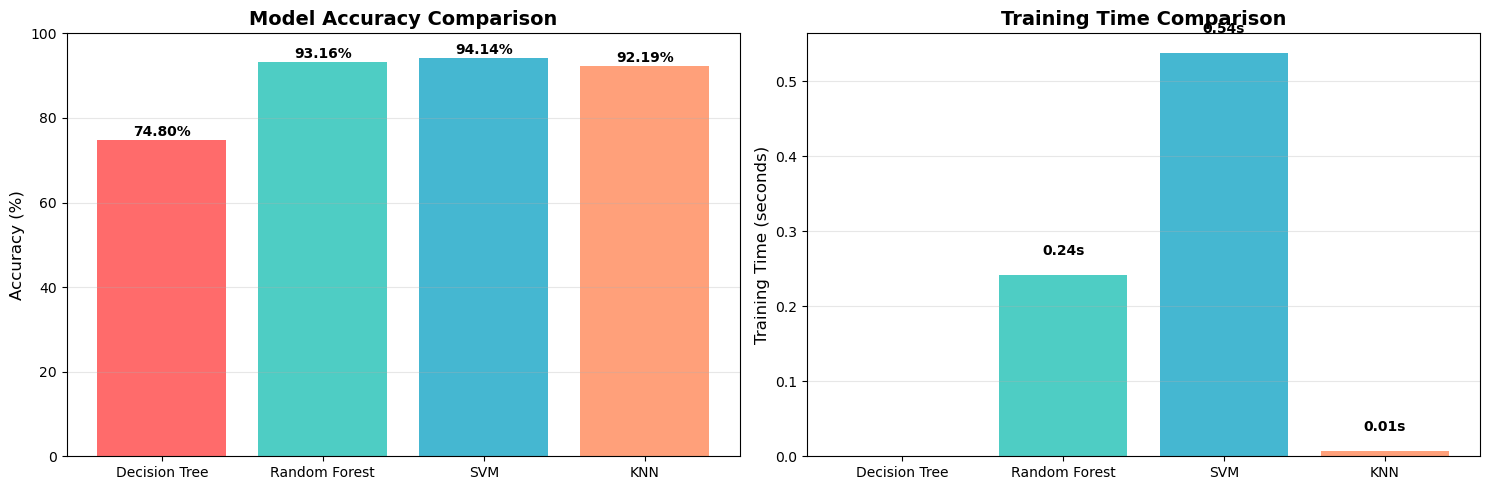

In [13]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy comparison
axes[0].bar(comparison_df['Model'], comparison_df['Accuracy (%)'], color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
axes[0].set_ylabel('Accuracy (%)', fontsize=12)
axes[0].set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
axes[0].set_ylim([0, 100])
axes[0].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['Accuracy (%)']):
    axes[0].text(i, v + 1, f'{v:.2f}%', ha='center', fontweight='bold')

# Training time comparison (log scale for better visualization)
axes[1].bar(comparison_df['Model'], comparison_df['Training Time (s)'], color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
axes[1].set_ylabel('Training Time (seconds)', fontsize=12)
axes[1].set_title('Training Time Comparison', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)
for i, v in enumerate(comparison_df['Training Time (s)']):
    if v > 0:
        axes[1].text(i, v + max(comparison_df['Training Time (s)'])*0.05, f'{v:.2f}s', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### Detailed Performance Analysis: Confusion Matrices

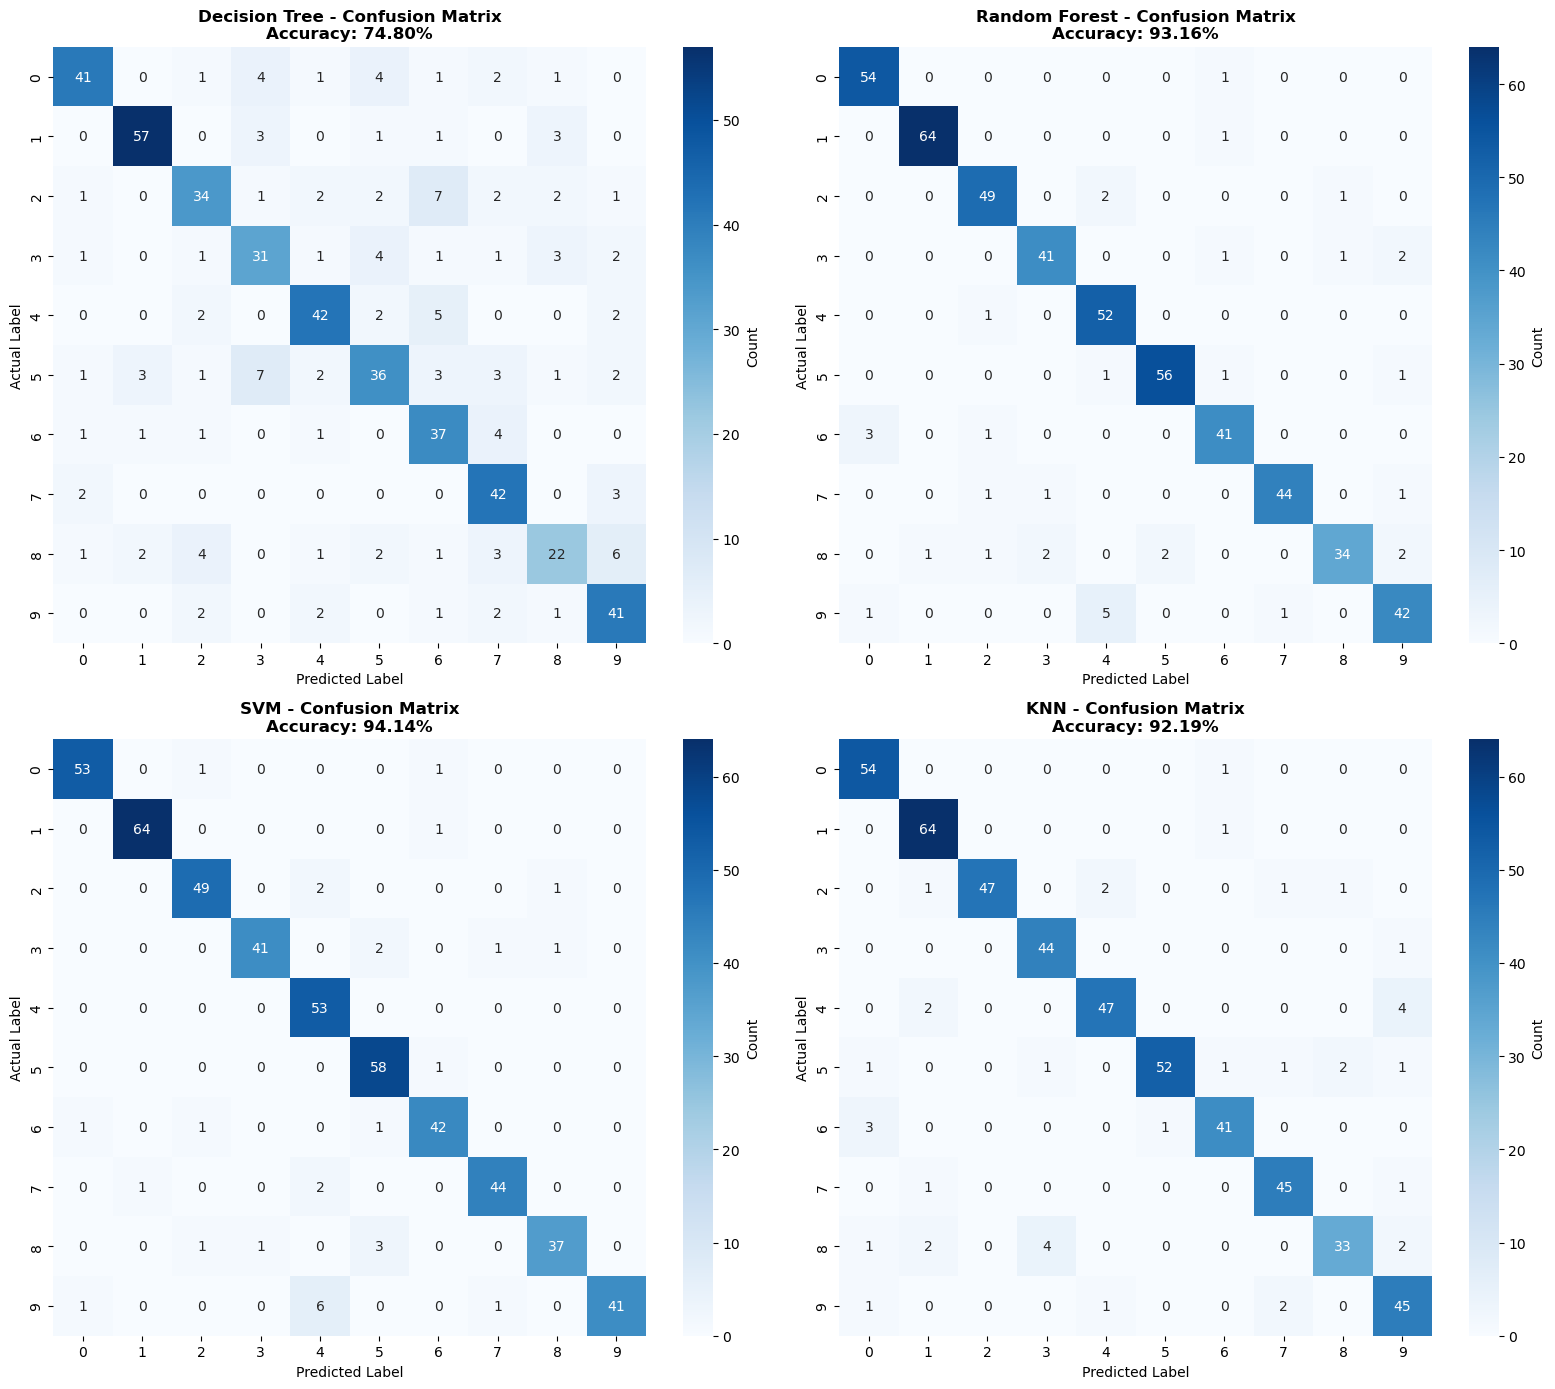

In [14]:
# Create confusion matrices for all models
models = {
    'Decision Tree': (p, clf),
    'Random Forest': (rf_predictions, rf_clf),
    'SVM': (svm_predictions, svm_clf),
    'KNN': (knn_predictions, knn_clf)
}

fig, axes = plt.subplots(2, 2, figsize=(16, 14))
axes = axes.flatten()

for idx, (name, (predictions, model)) in enumerate(models.items()):
    cm = confusion_matrix(actual_label, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx], 
                cbar_kws={'label': 'Count'})
    axes[idx].set_title(f'{name} - Confusion Matrix\nAccuracy: {accuracy_score(actual_label, predictions)*100:.2f}%', 
                       fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Predicted Label', fontsize=10)
    axes[idx].set_ylabel('Actual Label', fontsize=10)

plt.tight_layout()
plt.show()

### Classification Reports: Per-Class Performance

In [15]:
# Print detailed classification reports
print("="*70)
print("DETAILED CLASSIFICATION REPORTS")
print("="*70)

for name, predictions in [('Decision Tree', p), ('Random Forest', rf_predictions), 
                         ('SVM', svm_predictions), ('KNN', knn_predictions)]:
    print(f"\n{name}:")
    print("-" * 70)
    print(classification_report(actual_label, predictions, 
                                target_names=[str(i) for i in range(10)]))
    print("="*70)

DETAILED CLASSIFICATION REPORTS

Decision Tree:
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.75      0.80        55
           1       0.90      0.88      0.89        65
           2       0.74      0.65      0.69        52
           3       0.67      0.69      0.68        45
           4       0.81      0.79      0.80        53
           5       0.71      0.61      0.65        59
           6       0.65      0.82      0.73        45
           7       0.71      0.89      0.79        47
           8       0.67      0.52      0.59        42
           9       0.72      0.84      0.77        49

    accuracy                           0.75       512
   macro avg       0.74      0.74      0.74       512
weighted avg       0.75      0.75      0.75       512


Random Forest:
----------------------------------------------------------------------
              precision    recall  

## Key Findings and Recommendations

### Why Alternative Models Perform Better:

1. **Random Forest**: 
   - Ensemble method reduces variance and overfitting
   - Multiple trees vote on predictions, leading to more stable results
   - Better handles the high-dimensional pixel space

2. **SVM with RBF Kernel**:
   - Captures non-linear relationships between pixels
   - Effective in high-dimensional spaces (784 features)
   - Good generalization through margin maximization

3. **KNN**:
   - Instance-based learning adapts to local patterns
   - No assumptions about data distribution
   - Can capture complex decision boundaries

### Recommendations for Further Improvement:

1. **Neural Networks (CNNs)**: Convolutional Neural Networks are specifically designed for image recognition and would likely achieve 95%+ accuracy
2. **Feature Engineering**: Consider dimensionality reduction (PCA) or feature extraction
3. **Data Augmentation**: Increase dataset size with rotations, translations, noise variations
4. **Hyperparameter Tuning**: Optimize parameters for each model using GridSearchCV
5. **Ensemble Methods**: Combine predictions from multiple models for even better performance

Noise Test: Simulating bad scan, messy handwriting, noisy sensor to test model robustness

In [16]:
d = xtest[2] # take a test image

num_noisy_pixels = 100 # add noise to 100 pixels of this image
for i in range(num_noisy_pixels):
    position = np.random.randint(0, 784, 1)[0] # take a random pixel
    noise = np.random.randint(-200, 200, 1)[0]
    d[position] += noise # add noise to this pixel
    d[position] = d[position] % 255 # values must be between 0 and 255
print("Prediction after noise:", clf.predict([d])) # predict the digit from the noisy image

Prediction after noise: [6]


Display the image: 

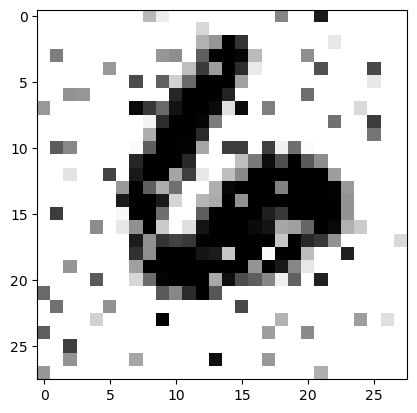

In [17]:
d.shape = (28,28)
plt.imshow(255-d, cmap='gray')
plt.show()

## 1. Program Analysis:

The program performs handwritten digit recognition from a dataset.

#### Dataset:
Each row of the dataset contains:
- First column: the actual digit (label)
- Next 784 columns: the image pixels

#### Input/Output:
Input: a vector of 784 pixels representing an image
Output: a digit between 0 and 9 that is handwritten in the image

Therefore, the number of features is 784 and this is a supervised classification problem.

#### Technique Used:

Algorithm used: Decision Tree Classifier

## 2. Machine Learning Pipeline Steps:

#### 1) Data Loading
Reading the dataset from the CSV file: images_chiffres_codees_niveau_de_gris.csv

#### 2) Train/Test Split
Data is divided into two parts:

- Training data: to train the model (80% of the data)
- Testing data: to evaluate performance (20% of the data)

#### 3) Training
The model learns the relationship between pixels (x) and the digit (label)

#### 4) Prediction (Testing)
The model predicts the labels of test data using the Decision Tree

#### 5) Evaluation
Comparison between predictions and actual values to measure performance

### 3. Performance Metric:

The performance metric used is Accuracy (correct classification rate).

Accuracy = (Number of correct predictions / Total number of examples) × 100

It measures the percentage of images correctly recognized by the model.

### 4. Code Analysis (lines 18-23):


These lines add random noise to a test image by modifying 100 pixels. This tests whether the model can recognize digits even if the image is degraded (imperfect handwriting, blurry image, sensor noise, etc.)

For each iteration:
- A random pixel is selected
- A random value (noise) is added
- The value is normalized between 0 and 255

## 